# Exploratory Data Analysis

### Installing requirements

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

from datetime import datetime, timedelta

### Loading Datasets

In [68]:
cities = pd.read_csv("Data/City.csv")
cabs = pd.read_csv("Data/Cab_Data.csv")
customers = pd.read_csv("Data/Customer_ID.csv")
transcations = pd.read_csv("Data/Transaction_ID.csv")

print("Done")

Done


### Descriptive analysis

#### Cities

In [69]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [70]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [71]:
cities

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


<b>Insights</b>:
<ul>
<li>Data set has no missing values</li>
<li>Population and Users features are real numbers, but written in inappropriate for python format</li>
</ul>

<b>Propositions</b>:
<ul>
<li>Convert Population and Users feature into "int64" format (for possible future use)</li>
</ul>

In [72]:
cities.Population = cities.Population.apply(lambda x: int(''.join(x.split(','))))
cities.Users = cities.Users.apply(lambda x: int(''.join(x.split(','))))

Now let's see what is the relation of population and users in each city

In [73]:
cities["Users_Ratio"] = (cities["Users"] / cities["Population"]) * 100
cities = cities.sort_values(by=['Users_Ratio'], ascending=False)
cities = cities.reset_index(drop=True)


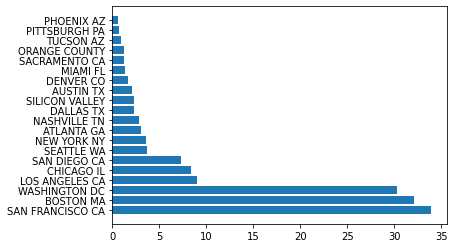

In [74]:
plt.barh(cities["City"], cities["Users_Ratio"])
plt.show()

<b>Insights</b>:
<ul>
<li>San Francisco, Boston and Washington are cities with the biggest Users Ratio</li>
</ul>

### Cabs transaction details

In [75]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [76]:
cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


<b>Insights</b>:
<ul>
<li>Date of Travel must be converted into y/m/d format</li>
<li>There are two companies: Pink Cab and Yellow Cab</li>
<li>There are no missing values</li>
</ul>

In [77]:
# Converting date of travel into y/m/d format

cabs["Date of Travel"] = cabs["Date of Travel"].apply(lambda x: to_date_format(x))

In [78]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [79]:
# Discovering the numerical data distribution

cabs_num_stats = cabs.describe()
cabs_num_stats.loc['var'] = cabs.var(numeric_only=True).tolist()
cabs_num_stats.loc['skew'] = cabs.skew(numeric_only=True).tolist()
cabs_num_stats.loc['kurt'] = cabs.kurt(numeric_only=True).tolist()

cabs_num_stats

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000
var,1.607971e+10,149.659157,75283.787046,24961.996964
skew,7.232657e-05,0.055779,0.873761,0.137958


In [80]:
cabs.describe(include=["O"])

,Company,City
count,359392,359392
unique,2,19
top,Yellow Cab,NEW YORK NY
freq,274681,99885


<b>Insights</b>:
<ul>
<li>Transaction ID is categorical feature and each value is unique</li>
<li>KM Travelled and Cost of Trip have big negative kurtosis, which indicates that the data exhibit less extreme outliers than a normal distribution</li>
<li>Price charged feature has big variance and is skewed right</li>
</ul>

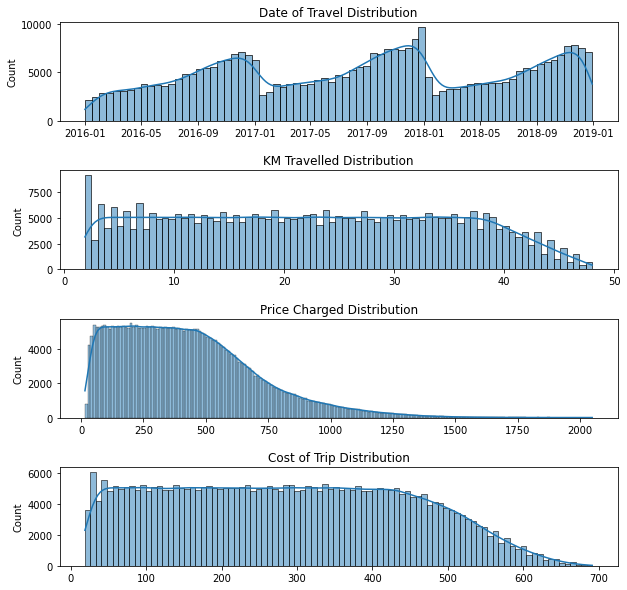

In [81]:
# Numerical data distribution

fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ax = ax.flatten()

for i, var in enumerate(cabs.loc[:, cabs.columns != 'Transaction ID'].select_dtypes(exclude='object')):
    sns.histplot(data=cabs, x=var, kde=True, ax=ax[i])
    ax[i].set_title(f"{var} Distribution")
    ax[i].set(xlabel=None)

plt.subplots_adjust(hspace=0.5)
plt.show()

<b>Insights</b>:
<ul>
<li>Date of Travel distribution is divided by 3 years: 2016-2018. Values depend on season (Summer, Sutumn)</li>
<li>All the other features have outliers and if we don't take them into account, they are approximately uniformly distributed</li>
</ul>

<b>Propositions</b>:
<ul>
<li>Remove outliers</li>
</ul>

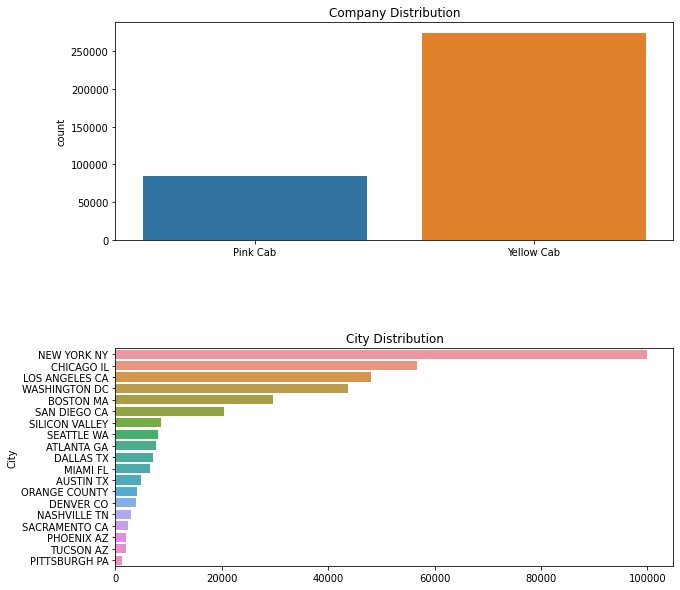

In [82]:
# Categorical data distributions

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax = ax.flatten()

# for i, var in enumerate(cabs.loc[:, cabs.columns != 'Transaction ID'].select_dtypes(include='object')):
#     sns.countplot(cabs[var], ax=ax[i])
#     ax[i].set_title(f"{var} Distribution")
#     ax[i].set(xlabel=None)

sns.countplot(x='Company', data=cabs, ax=ax[0])
ax[0].set_title("Company Distribution")
ax[0].set(xlabel=None)

sns.countplot(y='City', data=cabs, order=cabs['City'].value_counts().index, ax=ax[1])
ax[1].set_title("City Distribution")
ax[1].set(xlabel=None)


plt.subplots_adjust(hspace=0.5)
plt.show()

<b>Insights</b>:
<ul>
<li>There are more transcations for Yellow Cab Company</li>
<li>Cities with bigger amount of users have more transactions</li>
</ul>

In [83]:
# Detecting outliers in numerical features

def remove_outliers(column):
    try:
        p25 = column.describe()[4]
        p75 = column.describe()[6]
    except:
        return

    IQR = p75 - p25
    ul = p75 + 1.5 * IQR
    il = p25 - 1.5 * IQR
    column.mask(column > ul, ul, inplace=True)
    column.mask(column < il, il, inplace=True)


for i, var in enumerate(cabs.loc[:, cabs.columns != 'Transaction ID'].select_dtypes(exclude='object')):
    remove_outliers(cabs[var])

print("DONE")

DONE


/var/folders/19/6fxk39qn5xq4llhgjf6z4tl00000gn/T/ipykernel_1064/3916967592.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  p25 = column.describe()[4]
/var/folders/19/6fxk39qn5xq4llhgjf6z4tl00000gn/T/ipykernel_1064/3916967592.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  p75 = column.describe()[6]


### Customers information

In [84]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [85]:
customers.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [86]:
# Discovering the numerical data distribution

customers_num_stats = customers.describe()
customers_num_stats.loc['var'] = customers.var(numeric_only=True).tolist()
customers_num_stats.loc['skew'] = customers.skew(numeric_only=True).tolist()
customers_num_stats.loc['kurt'] = customers.kurt(numeric_only=True).tolist()

customers_num_stats

,Customer ID,Age,Income (USD/Month)
count,4.917100e+04,49171.000000,4.917100e+04
mean,2.839825e+04,35.363121,1.501563e+04
std,1.771414e+04,12.599066,8.002208e+03
min,1.000000e+00,18.000000,2.000000e+03
25%,1.265450e+04,25.000000,8.289500e+03
50%,2.763100e+04,33.000000,1.465600e+04
75%,4.328450e+04,42.000000,2.103500e+04
max,6.000000e+04,65.000000,3.500000e+04
var,3.137907e+08,158.736455,6.403534e+07
skew,1.414939e-01,0.685934,3.131483e-01


In [87]:
customers.describe(include=["O"])

,Gender
count,49171
unique,2
top,Male
freq,26562


<b>Insights</b>:
<ul>
<li>Customer ID is categorical and each value is unique</li>
<li>Age feature is skewed</li>
<li>Income feature has high variance</li>
<li>There are no missing values</li>
</ul>

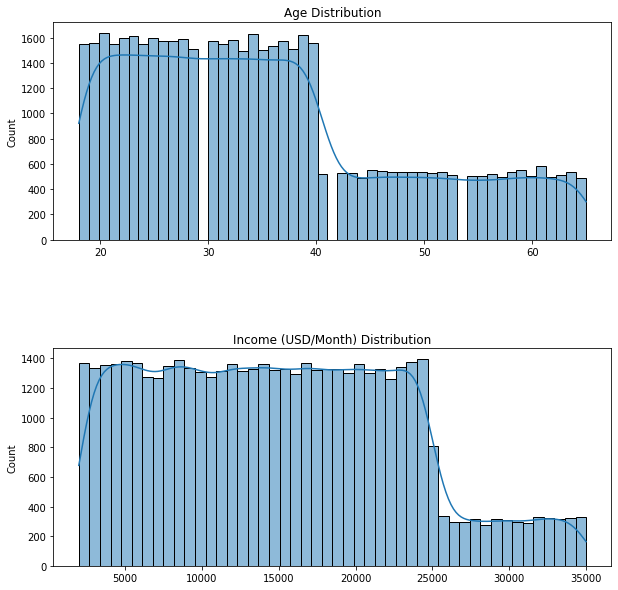

In [88]:
# Numerical data distribution

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax = ax.flatten()

for i, var in enumerate(customers.loc[:, customers.columns != 'Customer ID'].select_dtypes(exclude='object')):
    sns.histplot(data=customers, x=var, kde=True, ax=ax[i])
    ax[i].set_title(f"{var} Distribution")
    ax[i].set(xlabel=None)

plt.subplots_adjust(hspace=0.5)
plt.show()

<b>Insights</b>:
<ul>
<li>There are fewer people of age > 40</li>
<li>Income is skewed right</li>
</ul>

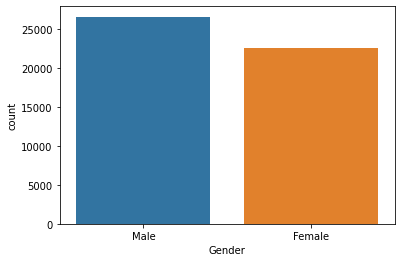

In [89]:
# Categorical data distribution

sns.countplot(x=customers.Gender)
plt.show()

<b>Insights</b>:
<ul>
<li>There are more Male customers than Female</li>
</ul>

### Transaction to customer mapping

In [90]:
transcations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [91]:
transcations.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [92]:
transcations.describe(include=["O"])

,Payment_Mode
count,440098
unique,2
top,Card
freq,263991


<b>Insights</b>:
<ul>
<li>Table matches transaction ID to customer ID</li>
<li>There are two payment modes: Cash and Card</li>
</ul>

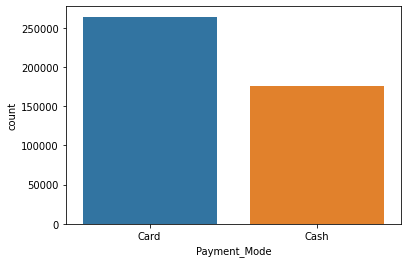

In [93]:
# Categorical Data distribution

sns.countplot(x=transcations.Payment_Mode)
plt.show()

<b>Insights</b>:
<ul>
<li>There are more Card transactions than Cash transactions</li>
</ul>

### Correlation Analysis

#### Km Traveled vs Cost of Trip

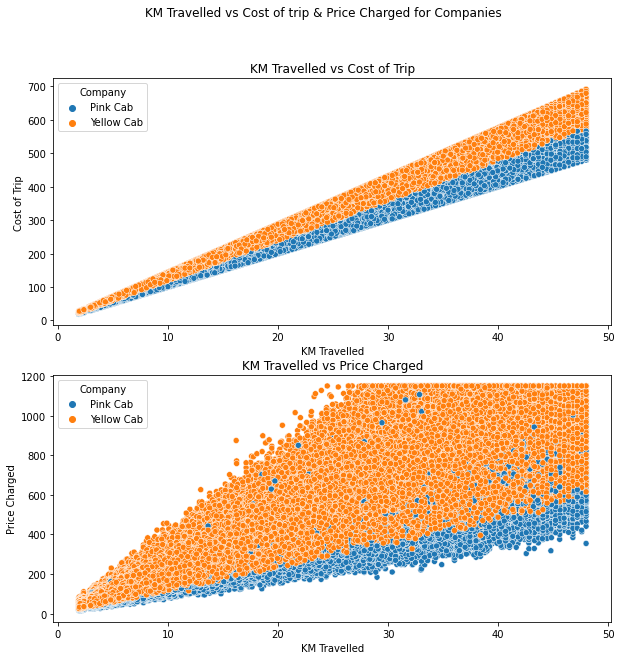

In [94]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('KM Travelled vs Cost of trip & Price Charged for Companies')

sns.scatterplot(data=cabs, x='KM Travelled', y='Cost of Trip' , hue="Company", ax=ax[0]).set_title("KM Travelled vs Cost of Trip")

sns.scatterplot(data=cabs, x='KM Travelled', y='Price Charged' , hue="Company", ax=ax[1]).set_title("KM Travelled vs Price Charged")

plt.show()

<b>Insights</b>:
<ul>
<li>There is some correlation between KM Travelled and Cost of Trip and Price Charged</li>
<li>Cost of Trip is lower for Pink Cab, but the Price Charged for the same amount of KM travelled is the same, as for the Yellow Cab</li>
</ul>

In [95]:
# Correlation between Cost of Trip and

cabs[["KM Travelled", "Cost of Trip", "Price Charged"]].corr()

,KM Travelled,Cost of Trip,Price Charged
KM Travelled,1.000000,0.981848,0.845501
Cost of Trip,0.981848,1.000000,0.869303
Price Charged,0.845501,0.869303,1.000000


In [96]:
# Correlation between Company and Cost of Trip

In [97]:
# T-test

yellow_cab = cabs.loc[cabs.Company == "Yellow Cab"]["Cost of Trip"]
pink_cab = cabs.loc[cabs.Company == "Pink Cab"]["Cost of Trip"]

ttest = sp.stats.ttest_ind(yellow_cab, pink_cab)

print(f"p-value: {ttest[1]}, t-statistic: {ttest[0]}")

p-value: 0.0, t-statistic: 80.8861018010166


#### Company vs Revenue

In [98]:
cabs["Earned"] = cabs["Price Charged"] - cabs["Cost of Trip"]

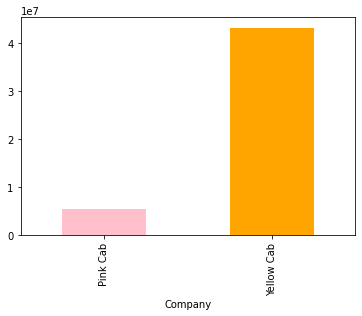

In [159]:
revenue_company = cabs.groupby("Company").Earned.sum()

revenue_company.plot.bar(color=['pink', "orange"])
plt.show()

In [100]:
# T-test

yellow_cab = cabs.loc[cabs.Company == "Yellow Cab"]["Earned"]
pink_cab = cabs.loc[cabs.Company == "Pink Cab"]["Earned"]

ttest = sp.stats.ttest_ind(yellow_cab, pink_cab)

print(f"p-value: {ttest[1]}, t-statistic: {ttest[0]}")

p-value: 0.0, t-statistic: 164.97381752181565


<b>Insights</b>:
<ul>
<li>Yellow Cab earns more money than Pink Cab, even though Pink Cab has lower Cost of Trip</li>
</ul>

### Earned vs City

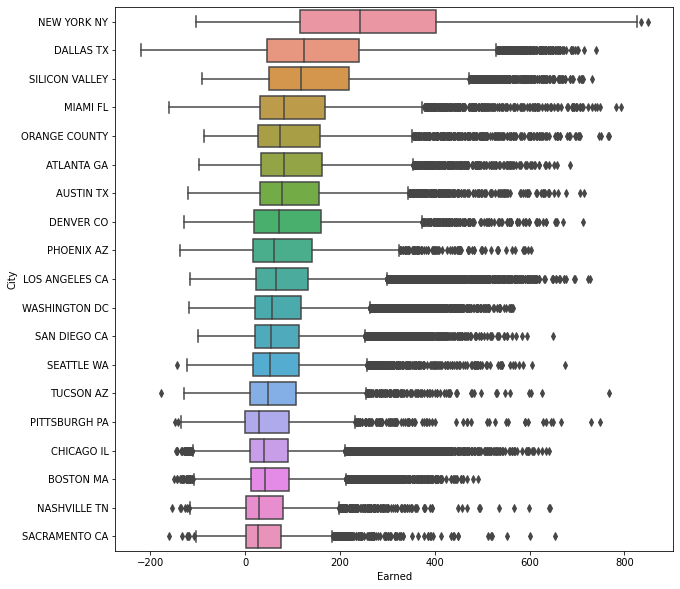

In [101]:
plt.figure(figsize=(10,10))
order = cabs.groupby(by=["City"])["Earned"].mean().sort_values(ascending=False).index
sns.boxplot(data=cabs, y="City", x="Earned", order=order)

plt.show()

In [102]:
# ANOVA

groups = []

for city in cabs.City.unique().tolist():
    groups.append(
        cabs.Earned[cabs.City == city]
    )

anova = sp.stats.f_oneway(*groups)

print(f"p-value: {anova[1]}, f-statistic: {anova[0]}")

p-value: 0.0, f-statistic: 10086.284102347096


<b>Insights</b>:
<ul>
<li>Revenue depends on a City</li>
</ul>

### City vs Company

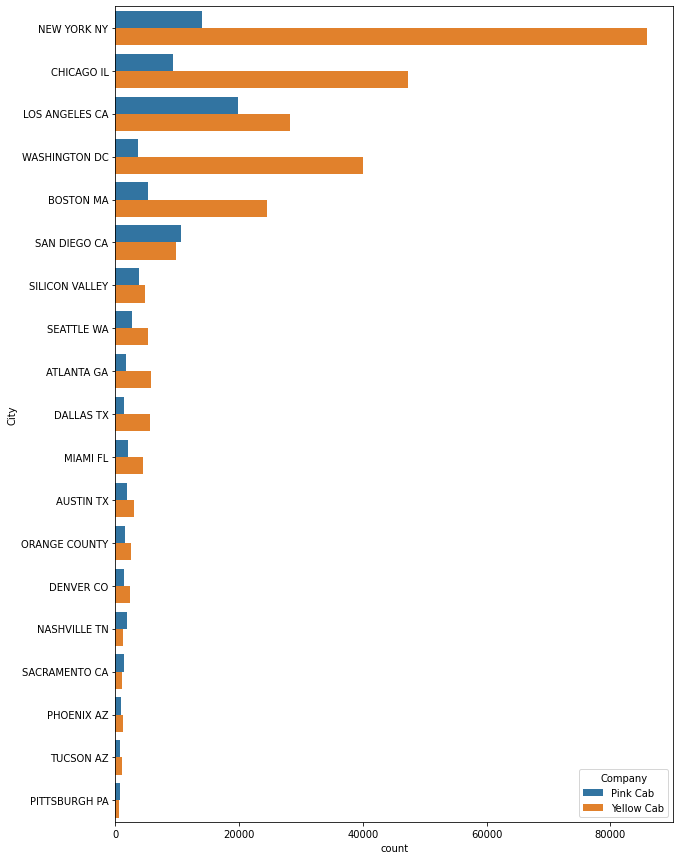

In [103]:
plt.figure(figsize=(10,15))

order = cabs.groupby(by=["City"])['Company'].count().sort_values(ascending=False).index
sns.countplot(data=cabs, y="City", hue="Company", order=order)

plt.show()

<b>Insights</b>:
<ul>
<li>Yellow Cab is more popular almost in every city</li>
</ul>

### Year vs Company

In [104]:
cabs["Year"] = cabs["Date of Travel"].apply(lambda x: x.year)

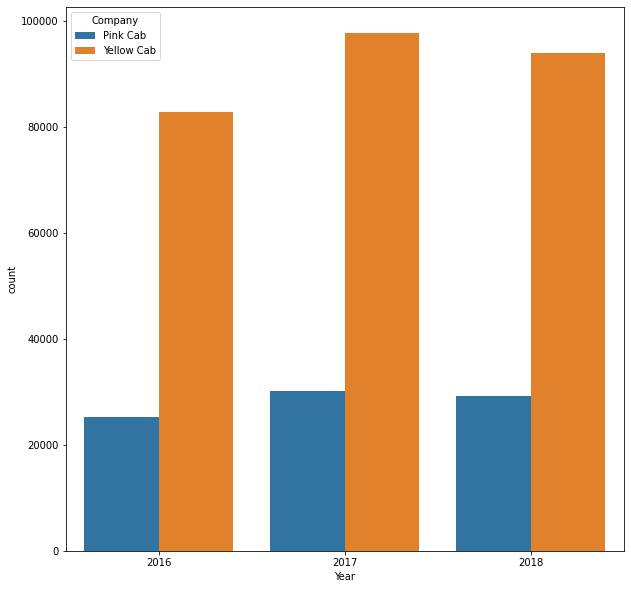

In [105]:
plt.figure(figsize=(10,10))

sns.countplot(data=cabs, x="Year", hue="Company")
plt.show()

<b>Insights</b>:
<ul>
<li>Companies user base grew from 2016 to 2017, but then amount of users slightly decreased</li>
<li>From 2016 to 2017 Yellow Cab showed bigger increase in user base</li>
</ul>

### Year vs Revenue

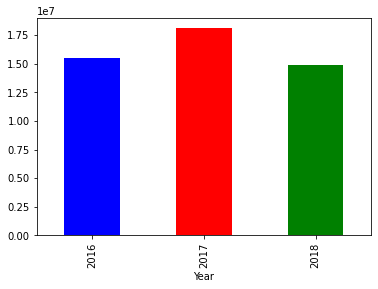

In [155]:
year_revenue = cabs.groupby("Year").Earned.sum()

year_revenue.plot.bar(color=["b", "r", "g"])
plt.show()

<b>Insights</b>:
<ul>
<li>There was an increase in revenue in 2017</li>
<li>There was a decrease in revenue in 2018</li>
</ul>

### Season vs Revenue

In [107]:
def Map_Season(month):
    if month in [11, 1, 2]:
        return "Winter"
    elif month in range(3, 6):
        return "Spring"
    elif month in range(6, 9):
        return "Summer"
    else:
        return "Fall"

cabs["Season"] = cabs["Date of Travel"].apply(lambda x: Map_Season(x.month))

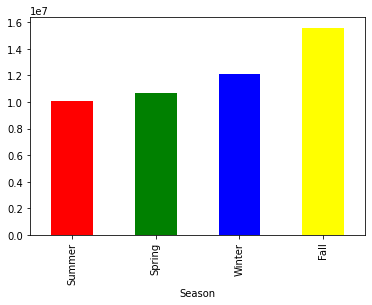

In [151]:
season_revenue = cabs.groupby("Season").Earned.sum().sort_values(ascending=True)

season_revenue.plot.bar(color=["red", "green", "blue", "yellow"])
plt.show()

<b>Insights</b>:
<ul>
<li>Spring is the most beneficial month</li>
<li>Summer is the least beneficial month</li>
</ul>

### Company vs Season

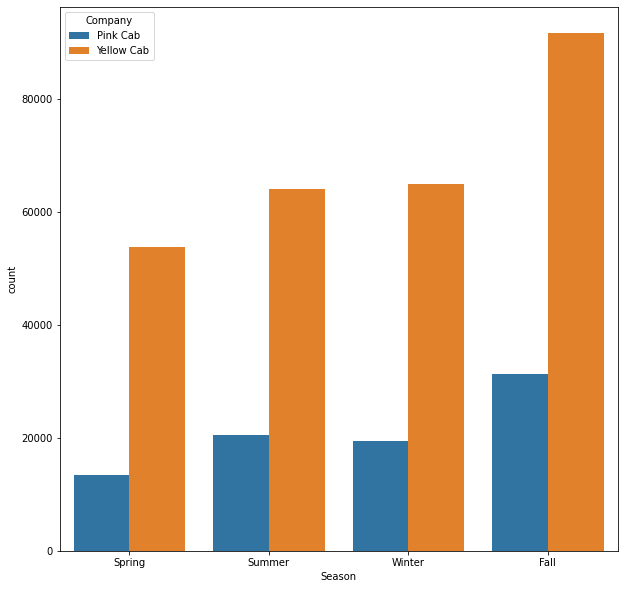

In [109]:
plt.figure(figsize=(10,10))

order = cabs.groupby("Season").Company.count().sort_values(ascending=True).index
sns.countplot(data=cabs, x="Season", hue="Company", order=order)
plt.show()

<b>Insights</b>:
<ul>
<li>There are more clients during the Fall and Winter</li>
</ul>

### Gender vs Revenue

In [110]:
cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Earned,Year,Season
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,2016,Winter
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,2016,Winter
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,2016,Winter
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,2016,Winter
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,2016,Winter


In [119]:
transcations.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [111]:
customers.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [131]:
cabs = pd.merge(cabs, transcations[["Customer ID", "Transaction ID"]], on="Transaction ID", how="inner")

cabs = pd.merge(cabs, customers[["Customer ID", "Gender"]], on="Customer ID", how="inner")

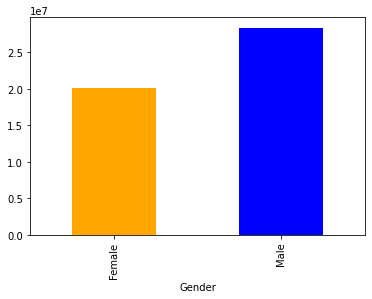

In [146]:
gender_rev = cabs.groupby("Gender").Earned.sum()
gender_rev.plot.bar(color=["orange", "blue"])

plt.show()

<b>Insights</b>:
<ul>
<li>Companies make more money off men than women</li>
</ul>

# Data Analysis Results

I've collected enough information in order to make data analysis report. During Week 3 I'll create more beautiful and readable graphs.